In [1]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from stock_trading_util import download_price, read_price, line_plot, add_bbvalue, add_so, add_rtrn, add_rsi, calc_bt_pl

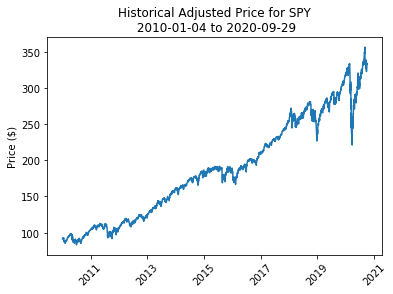

In [3]:
df_prc = download_price('SPY', '2010-01-01', '2020-09-30')
#df_prc = read_price('SPY', '2010-01-01', '2020-09-30')
line_plot(df_prc, 'SPY')

In [3]:
df_prc = add_bbvalue(df_prc.loc[:,['Date', 'SPY']], 'SPY')
df_prc['bbvalue20'] = df_prc.bbvalue20 / 100.0
df_prc = add_so(df_prc, 'SPY')
df_prc['so20'] = (df_prc.so20 - 0.5) / 10.0
df_prc = add_rsi(df_prc, 'SPY')
df_prc['rsi14'] = (df_prc.rsi14 - 0.5) / 10.0
df_prc = add_rtrn(df_prc, 'SPY', 'b', 20)
df_prc = add_rtrn(df_prc, 'SPY', 'b', 5)
df_prc = add_rtrn(df_prc, 'SPY', 'b', 1)
df_prc = add_rtrn(df_prc, 'SPY', 'f', 1)

In [4]:
X = df_prc.iloc[20:2516, 2:-1].values
y = df_prc.iloc[20:2516, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=100)
#X_train = df_prc.iloc[2016:2516, 2:-1].values
#X_test = df_prc.iloc[-120:-1, 2:-1].values
#y_train = df_prc.iloc[2016:2516, -1].values
#y_test = df_prc.iloc[-120:-1, -1].values
def X_y_test(idx):
    return df_prc.iloc[idx:-1, 2:-1].values, df_prc.iloc[idx:-1, -1].values, df_prc.iloc[idx:-1]
X_test, y_test, df_test = X_y_test(2516)

In [5]:
clf = LinearRegression()  
regressor = clf.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, df_prc.columns[2:-1], columns=['Coefficient'])  
coeff_df

,Coefficient
bbvalue20,0.163371
so20,-0.021773
rsi14,-0.058982
rtrn_b_20d,-0.007159
rtrn_b_5d,-0.031214
rtrn_b_1d,-0.058978


In [6]:
y_pred = clf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'rtrn_1d': df_test.rtrn_b_1d, 'price': df_test.SPY})

In [7]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))  

('Mean Absolute Error:', 0.01826157272052565)
('Mean Squared Error:', 0.0007619702749063199)
('Root Mean Squared Error:', 0.027603809065169245)
('R2 Score:', 0.040323833828842415)


In [8]:
df['pstn'] = 0
df.loc[df.Predicted>0.002, 'pstn'] = 1
df.loc[df.Predicted<-0.002, 'pstn'] = -1
df

,Actual,Predicted,price,rtrn_1d,pstn
2516,-0.007572,-0.000793,321.555786,0.009352,0
2517,0.003815,0.000674,319.120911,-0.007572,0
2518,-0.002812,-0.000109,320.338379,0.003815,0
2519,0.005330,0.000136,319.437653,-0.002812,0
2520,0.006781,-0.000408,321.140106,0.005330,0
2521,-0.002878,0.000058,323.317627,0.006781,0
2522,0.006877,0.000407,322.387207,-0.002878,0
2523,-0.001525,0.000180,324.604401,0.006877,0
2524,0.002260,0.000418,324.109497,-0.001525,0
2525,0.008318,0.000228,324.841919,0.002260,0


In [9]:
pl_buyhold, pl_trade = calc_bt_pl(df)

In [10]:
print('Buy and hold returns ${} for $1 investment.'.format(pl_buyhold))
print('Linear regression based trading returns ${} for $1 investment.'.format(pl_trade))

Buy and hold returns $0.9331 for $1 investment.
Linear regression based trading returns $1.2949 for $1 investment.
